## SON
Burda yapılan tüm işlemler özetlenerek tek bir dataframe üzerinde performans testleri yapıldı. Diğer .ipynb uzantılı sayfalarda ise burdaki algoritmalar açıklandı.

In [26]:
import nltk                                 # Python un NLP kütüphanesini ekledik
from nltk.corpus import twitter_samples     # Twitter verisetini import ettik
import matplotlib.pyplot as plt           
import random 

In [27]:
 #### Bu kod dosyayı root/nltk_data/corpara/twitter_samples yolu içerisine download eder. ####
 # nltk.download('twitter_samples')

In [28]:
import pandas as pd
import numpy as np

In [29]:
# df_pos = pd.read_json(r'/root/nltk_data/corpora/twitter_samples/positive_tweets.json', lines = True, encoding='utf-8')
# df_neg = pd.read_json(r'/root/nltk_data/corpora/twitter_samples/negative_tweets.json', lines = True, encoding='utf-8')

df_pos = pd.read_json("positive_tweets.json", lines = True, encoding= 'UTF-8')
df_neg = pd.read_json("negative_tweets.json", lines = True, encoding= 'UTF-8')

In [30]:
print(df_pos.shape)
print(df_neg.shape)

(5000, 28)
(5000, 28)


In [31]:
positive_sentiment = []
for i in range(0,5000):
    positive_sentiment.append(1)

print(len(positive_sentiment))

df_pos['sentiment'] = positive_sentiment # positive tweets sentiment kolonu eklendi


5000


In [32]:
dataframe_id = []
for i in range(0,5000):
    i+=1
    dataframe_id.append(i)

print(len(dataframe_id)) 

df_pos['df_id'] = dataframe_id 

5000


In [33]:
print(df_pos.shape)
df_pos.head()

(5000, 30)


,contributors,coordinates,text,user,retweet_count,favorited,entities,source,truncated,geo,...,metadata,favorite_count,id_str,id,possibly_sensitive,quoted_status_id,quoted_status,quoted_status_id_str,sentiment,df_id
0,NaN,None,#FollowFriday @France_Inte @PKuchly57 @Milipol...,"{'time_zone': 'Paris', 'profile_background_ima...",0,False,"{'hashtags': [{'indices': [0, 13], 'text': 'Fo...","<a href=""https://commun.it"" rel=""nofollow"">Com...",False,None,...,"{'iso_language_code': 'en', 'result_type': 're...",0,624495129303351296,624495129303351296,NaN,NaN,NaN,NaN,1,1
1,NaN,None,@Lamb2ja Hey James! How odd :/ Please call our...,"{'time_zone': 'London', 'profile_background_im...",0,False,"{'hashtags': [], 'user_mentions': [{'screen_na...","<a href=""http://twitter.com"" rel=""nofollow"">Tw...",False,None,...,"{'iso_language_code': 'en', 'result_type': 're...",0,624495128510656512,624495128510656513,NaN,NaN,NaN,NaN,1,2
2,NaN,None,@DespiteOfficial we had a listen last night :)...,"{'time_zone': 'Casablanca', 'profile_backgroun...",0,False,"{'hashtags': [], 'user_mentions': [{'screen_na...","<a href=""http://twitter.com"" rel=""nofollow"">Tw...",False,None,...,"{'iso_language_code': 'en', 'result_type': 're...",0,624495126535106560,624495126535106560,NaN,NaN,NaN,NaN,1,3
3,NaN,None,@97sides CONGRATS :),"{'time_zone': 'Paris', 'profile_background_ima...",0,False,"{'hashtags': [], 'user_mentions': [{'screen_na...","<a href=""http://twitter.com/download/iphone"" r...",False,None,...,"{'iso_language_code': 'en', 'result_type': 're...",0,624495126170238976,624495126170238976,NaN,NaN,NaN,NaN,1,4
4,NaN,None,yeaaaah yippppy!!! my accnt verified rqst has...,"{'time_zone': None, 'profile_background_image_...",0,False,"{'hashtags': [], 'user_mentions': [], 'urls': ...","<a href=""https://mobile.twitter.com"" rel=""nofo...",False,None,...,"{'iso_language_code': 'en', 'result_type': 're...",0,624495124148391936,624495124148391936,NaN,NaN,NaN,NaN,1,5


In [34]:
negative_sentiment = []
for i in range(0,5000):
    negative_sentiment.append(0)

df_neg['sentiment'] = negative_sentiment

In [35]:
dataframe_id = []
for i in range(5000,10000):
    i+=1
    dataframe_id.append(i)

print(len(dataframe_id)) 

df_neg['df_id'] = dataframe_id 

5000


In [36]:
print(df_neg.shape)
df_neg.tail()

(5000, 30)


,contributors,coordinates,text,user,retweet_count,favorited,entities,source,truncated,geo,...,metadata,favorite_count,id_str,id,quoted_status,quoted_status_id,possibly_sensitive,quoted_status_id_str,sentiment,df_id
4995,NaN,None,I wanna change my avi but uSanele :(,"{'screen_name': '__Zanele', 'time_zone': None,...",0,False,"{'hashtags': [], 'user_mentions': [], 'urls': ...","<a href=""http://twitter.com"" rel=""nofollow"">Tw...",False,None,...,"{'iso_language_code': 'en', 'result_type': 're...",0,624516792388599808,624516792388599808,NaN,NaN,NaN,NaN,0,9996
4996,NaN,None,MY PUPPY BROKE HER FOOT :(,"{'screen_name': 'ShawnsToronto', 'time_zone': ...",0,False,"{'hashtags': [], 'user_mentions': [], 'urls': ...","<a href=""http://twitter.com/download/iphone"" r...",False,None,...,"{'iso_language_code': 'en', 'result_type': 're...",5,624516790488551424,624516790488551424,NaN,NaN,NaN,NaN,0,9997
4997,NaN,None,where's all the jaebum baby pictures :((,"{'screen_name': 'backtomemp3', 'time_zone': 'E...",0,False,"{'hashtags': [], 'user_mentions': [], 'urls': ...","<a href=""http://twitter.com/#!/download/ipad"" ...",False,None,...,"{'iso_language_code': 'en', 'result_type': 're...",0,624516784289390592,624516784289390593,NaN,NaN,NaN,NaN,0,9998
4998,NaN,None,But but Mr Ahmad Maslan cooks too :( https://t...,"{'screen_name': 'syafiqqah', 'time_zone': 'Kua...",0,False,"{'hashtags': [], 'user_mentions': [], 'urls': ...","<a href=""http://twitter.com/download/android"" ...",False,None,...,"{'iso_language_code': 'en', 'result_type': 're...",2,624516784226340864,624516784226340864,"{'contributors': None, 'coordinates': None, 't...",6.244883e+17,0.0,6.244883e+17,0,9999
4999,NaN,None,@eawoman As a Hull supporter I am expecting a ...,"{'screen_name': 'AndrewByrom1', 'time_zone': N...",0,False,"{'hashtags': [], 'user_mentions': [{'id_str': ...","<a href=""http://twitter.com/download/android"" ...",False,None,...,"{'iso_language_code': 'en', 'result_type': 're...",0,624516782557151232,624516782557151232,NaN,NaN,NaN,NaN,0,10000


In [37]:
# İki json dosyası dataframe üzerinde satırları eklenerek birleştirildi
df_tam = pd.concat([df_pos, df_neg])
print(df_tam.shape)
df_tam.tail()

(10000, 30)


,contributors,coordinates,text,user,retweet_count,favorited,entities,source,truncated,geo,...,metadata,favorite_count,id_str,id,possibly_sensitive,quoted_status_id,quoted_status,quoted_status_id_str,sentiment,df_id
4995,NaN,None,I wanna change my avi but uSanele :(,"{'screen_name': '__Zanele', 'time_zone': None,...",0,False,"{'hashtags': [], 'user_mentions': [], 'urls': ...","<a href=""http://twitter.com"" rel=""nofollow"">Tw...",False,None,...,"{'iso_language_code': 'en', 'result_type': 're...",0,624516792388599808,624516792388599808,NaN,NaN,NaN,NaN,0,9996
4996,NaN,None,MY PUPPY BROKE HER FOOT :(,"{'screen_name': 'ShawnsToronto', 'time_zone': ...",0,False,"{'hashtags': [], 'user_mentions': [], 'urls': ...","<a href=""http://twitter.com/download/iphone"" r...",False,None,...,"{'iso_language_code': 'en', 'result_type': 're...",5,624516790488551424,624516790488551424,NaN,NaN,NaN,NaN,0,9997
4997,NaN,None,where's all the jaebum baby pictures :((,"{'screen_name': 'backtomemp3', 'time_zone': 'E...",0,False,"{'hashtags': [], 'user_mentions': [], 'urls': ...","<a href=""http://twitter.com/#!/download/ipad"" ...",False,None,...,"{'iso_language_code': 'en', 'result_type': 're...",0,624516784289390592,624516784289390593,NaN,NaN,NaN,NaN,0,9998
4998,NaN,None,But but Mr Ahmad Maslan cooks too :( https://t...,"{'screen_name': 'syafiqqah', 'time_zone': 'Kua...",0,False,"{'hashtags': [], 'user_mentions': [], 'urls': ...","<a href=""http://twitter.com/download/android"" ...",False,None,...,"{'iso_language_code': 'en', 'result_type': 're...",2,624516784226340864,624516784226340864,0.0,6.244883e+17,"{'contributors': None, 'coordinates': None, 't...",6.244883e+17,0,9999
4999,NaN,None,@eawoman As a Hull supporter I am expecting a ...,"{'screen_name': 'AndrewByrom1', 'time_zone': N...",0,False,"{'hashtags': [], 'user_mentions': [{'id_str': ...","<a href=""http://twitter.com/download/android"" ...",False,None,...,"{'iso_language_code': 'en', 'result_type': 're...",0,624516782557151232,624516782557151232,NaN,NaN,NaN,NaN,0,10000


In [38]:
df_tam.isnull().sum()

contributors                 10000
coordinates                   9937
text                             0
user                             0
retweet_count                    0
favorited                        0
entities                         0
source                           0
truncated                        0
geo                           9937
in_reply_to_status_id_str     5490
is_quote_status                  0
in_reply_to_user_id_str       4668
place                         9505
in_reply_to_status_id         5490
in_reply_to_screen_name       4668
lang                             0
retweeted                        0
in_reply_to_user_id           4668
created_at                       0
metadata                         0
favorite_count                   0
id_str                           0
id                               0
possibly_sensitive            8338
quoted_status_id              9675
quoted_status                 9676
quoted_status_id_str          9675
sentiment           

In [39]:
df_tam.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 4999
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype              
---  ------                     --------------  -----              
 0   contributors               0 non-null      float64            
 1   coordinates                63 non-null     object             
 2   text                       10000 non-null  object             
 3   user                       10000 non-null  object             
 4   retweet_count              10000 non-null  int64              
 5   favorited                  10000 non-null  bool               
 6   entities                   10000 non-null  object             
 7   source                     10000 non-null  object             
 8   truncated                  10000 non-null  bool               
 9   geo                        63 non-null     object             
 10  in_reply_to_status_id_str  4510 non-null   float64            
 11  is_

In [40]:
# Benzersiz 10000 tweet, 2 türdür.
df_tam[['text','sentiment']].describe().T

,count,mean,std,min,25%,50%,75%,max
sentiment,10000.0,0.5,0.500025,0.0,0.0,0.5,1.0,1.0


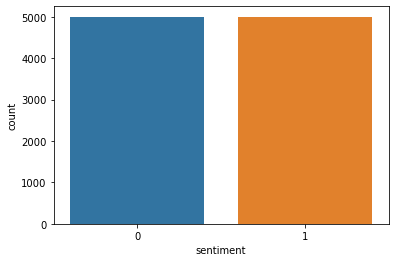

In [41]:
import seaborn as sns
ax = sns.countplot(x="sentiment", data=df_tam)

In [42]:
df_tam[['df_id','text','sentiment']]

,df_id,text,sentiment
0,1,#FollowFriday @France_Inte @PKuchly57 @Milipol...,1
1,2,@Lamb2ja Hey James! How odd :/ Please call our...,1
2,3,@DespiteOfficial we had a listen last night :)...,1
3,4,@97sides CONGRATS :),1
4,5,yeaaaah yippppy!!! my accnt verified rqst has...,1
...,...,...,...
4995,9996,I wanna change my avi but uSanele :(,0
4996,9997,MY PUPPY BROKE HER FOOT :(,0
4997,9998,where's all the jaebum baby pictures :((,0
4998,9999,But but Mr Ahmad Maslan cooks too :( https://t...,0


In [43]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [44]:
# dosyayı root/nltk_data/corpara/tokenizers/punkt yolu içerisine download eder.
import nltk
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Buseyalcin\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Buseyalcin\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


True

# Preprocessing

In [50]:
import re                                  # regular expressions kütüphanesi
import string                              # string operations icin
from nltk.corpus import stopwords          
from nltk.stem import PorterStemmer        
from nltk.tokenize import TweetTokenizer   
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem import WordNetLemmatizer
#from itertools import chain

In [51]:
df_tam[['sentiment','text']]

,sentiment,text
0,1,top engaged members community week
1,1,odd call able assist thanks
2,1,listen last night amazing track
3,1,
4,1,yeaaaah yippppy accnt verified rqst succeed go...
...,...,...
4995,0,wan na change avi usanele
4996,0,
4997,0,jaebum baby pictures
4998,0,cooks https


In [52]:
def Preprocessing(df):
    
    df['text'] = df['text'].apply(word_tokenize)
    print('Tokenization completed.')
    
    stop_words = set(stopwords.words("english"))
    df['text'] = df['text'].apply(lambda x: [item for item in x if item not in stop_words])
    print('stop words removed.')
    
    regex = '[a-z]+'
    df['text'] = df['text'].apply(lambda x: [item for item in x if re.match(regex, item)] )
    print('Number, punctuation and special characters removed.')
     
    lem = WordNetLemmatizer()
    df['text1'] = df['text'].apply(lambda x:[lem.lemmatize(item) for item in x])
    print('Stemming completed.')
    print('Data cleaning completed. \n')
    
    df['text'] = df['text'].apply(lambda x: " ".join(item.lower() for item in x))
    
    return df

df_tam=Preprocessing(df_tam)
df_tam[['sentiment','text']]

Tokenization completed.
stop words removed.
Number, punctuation and special characters removed.
Stemming completed.
Data cleaning completed. 



,sentiment,text
0,1,top engaged members community week
1,1,odd call able assist thanks
2,1,listen last night amazing track
3,1,
4,1,yeaaaah yippppy accnt verified rqst succeed go...
...,...,...
4995,0,wan na change avi usanele
4996,0,
4997,0,jaebum baby pictures
4998,0,cooks https


In [53]:
# random state ile aynı veri seti üzerinde çalışma sağlanır
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(df_tam['text'], df_tam['sentiment'], test_size=0.2, random_state=256)
print(X_train)

4349    flimflammery oh white rabbit cutest thing ever...
3754                                made calum layout liv
1401                                  thought today https
4474                                        going room bc
1028                     paddock found rolling us weekend
                              ...                        
1113                                moar kittehs incoming
1776    tou young hi hai na abhi talk baloch never goi...
2233                      fun even though wo n't able see
423     plan read brand new cook book figure make dinn...
2746                                      lol right wrote
Name: text, Length: 8000, dtype: object


# Metin Dönüşümü

* Her bir tweet(doküman) temsil eder.
* CountVectorizer terimleri alfabaye göre sıralar, matrisi de buna göre oluşturur.
*  Eğitim verisi hem fit hem de transform edilir.


In [54]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = TfidfVectorizer( sublinear_tf = True,
                             ngram_range = (1,1),
                             max_df = 0.5,
                             min_df = 10,
                             max_features = 3000)
vectorizer.fit(X_train)
train_MATRIX = vectorizer.fit_transform(X_train)
print(train_MATRIX)

  (0, 537)	0.4350701705466022
  (0, 429)	0.4847084964330092
  (0, 128)	0.44755613383581283
  (0, 489)	0.44755613383581283
  (0, 358)	0.4185195745936885
  (1, 308)	1.0
  (2, 233)	0.44700531754819656
  (2, 502)	0.5451620457176166
  (2, 495)	0.7092140649991506
  (3, 43)	0.5712070567871222
  (3, 415)	0.6704415431395224
  (3, 188)	0.4735299731899652
  (4, 551)	0.5415186660708456
  (4, 528)	0.4942729628374745
  (4, 166)	0.6800380669526643
  (5, 127)	0.5010889683700059
  (5, 418)	0.5830013678007183
  (5, 465)	0.6395461288448041
  (6, 568)	0.7560683426816327
  (6, 461)	0.6544926746684406
  (7, 272)	0.6942559908660549
  (7, 499)	0.7197281564219871
  (9, 375)	0.6448597812273303
  (9, 313)	0.7643008979161543
  (10, 77)	0.7829511181889273
  :	:
  (7993, 25)	0.40953232843105264
  (7993, 349)	0.34864367876034935
  (7993, 232)	0.2178047064981403
  (7993, 532)	0.3926986589574553
  (7993, 550)	0.3761684927669661
  (7994, 326)	1.0
  (7996, 480)	0.4299136929206232
  (7996, 348)	0.40202174044864647
  (799

In [55]:
# Burdaki feature(özellik) her bir tweet deki her bir terimdir
results = pd.DataFrame(train_MATRIX.toarray(), columns=vectorizer.get_feature_names())
results

,able,account,actually,add,address,af,ago,agree,ah,album,...,xx,xxx,ya,yeah,year,years,yes,yesterday,yet,zaynmalik
0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7996,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7997,0.473305,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7998,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [56]:
# Test verisi fit edilmez yani featurelara dahil edilmez
# Burda da test matrisi oluşturulur
Test_X_Tdif = vectorizer.transform(X_test)
print(Test_X_Tdif.shape)
print(train_MATRIX.shape)

(2000, 589)
(8000, 589)


In [57]:
# Eğitim verisiyle fit olan kelime dağarcığı
# thing kelimes 478 indisteki kelime
vocab = list(vectorizer.vocabulary_.items())
print(vocab)

[('oh', 358), ('thing', 489), ('ever', 128), ('seen', 429), ('wait', 537), ('made', 308), ('thought', 495), ('today', 502), ('https', 233), ('going', 188), ('room', 415), ('bc', 43), ('found', 166), ('us', 528), ('weekend', 551), ('stream', 465), ('said', 418), ('even', 127), ('still', 461), ('working', 568), ('time', 499), ('know', 272), ('many', 313), ('people', 375), ('could', 90), ('change', 77), ('lost', 298), ('album', 9), ('ca', 66), ('remember', 410), ('dreams', 113), ('love', 301), ('sharing', 436), ('eyes', 133), ('soon', 453), ('go', 185), ('first', 154), ('really', 407), ('dont', 111), ('wan', 540), ('na', 343), ('home', 224), ('top', 509), ('members', 321), ('community', 87), ('week', 550), ('hell', 216), ('feel', 146), ('like', 285), ('happened', 207), ('try', 517), ('get', 177), ('email', 122), ('bit', 53), ('info', 249), ('ur', 527), ('let', 281), ('tweets', 520), ('happy', 209), ('birthday', 52), ('hope', 225), ('good', 191), ('one', 363), ('keep', 259), ('travel', 513

# Naive Bayes

In [58]:
from sklearn import model_selection, naive_bayes, svm

Naive = naive_bayes.BernoulliNB() #binary classification
Naive.fit(train_MATRIX, y_train)

BernoulliNB()

In [59]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

predictions_NB = Naive.predict(Test_X_Tdif)
print("Naive Bayes Accuracy Score: ", accuracy_score(predictions_NB, y_test)*100)

Naive Bayes Accuracy Score:  67.95


##  Confusion Matrix
*  Accuracy  : doğru tahmin edilen veri oranı                                               TP+TN / P+N
*  Precision:  positive/negative  tahminlerden kaçının gerçekten  positive/negative olduğu    TP / (TP+FP)
*  Recall:     TPR(gerçek  positive/negative  tweetleri tespit etme oranı )                   TP / P     
* F1-score:    precision ve recall un harmonik ortalaması

Matriste toplam 2000 veri var yani test için ayırdığımız veri sayısı.
Bunlardan 762+599=1361 doğru, 404+235=639 tanesini yanlış tahmin etmiş.

In [60]:
cm = confusion_matrix(y_test, predictions_NB)
print(cm)

[[763 234]
 [407 596]]


In [61]:
print(classification_report(y_test,predictions_NB))

              precision    recall  f1-score   support

           0       0.65      0.77      0.70       997
           1       0.72      0.59      0.65      1003

    accuracy                           0.68      2000
   macro avg       0.69      0.68      0.68      2000
weighted avg       0.69      0.68      0.68      2000



# Svm (Support Vector Machine)

In [62]:
# rbf yerine 'linear' yaptığımızda başarı artar

SVM = svm.SVC(kernel='linear', random_state=0, C=1.0, degree=3, gamma='auto', probability=True)
SVM.fit(train_MATRIX, y_train)

predictions_SVM = SVM.predict(Test_X_Tdif)
print("SVM Accuracy Score: ", accuracy_score(predictions_SVM, y_test)*100)

SVM Accuracy Score:  67.95


In [63]:
print(classification_report(y_test,predictions_SVM))

              precision    recall  f1-score   support

           0       0.65      0.76      0.70       997
           1       0.72      0.60      0.65      1003

    accuracy                           0.68      2000
   macro avg       0.68      0.68      0.68      2000
weighted avg       0.68      0.68      0.68      2000



In [64]:
from sklearn import metrics

#sınıflamanın tüm eşikleri için FPR ve TPR’yi hesaplar
probs = SVM.predict_proba(Test_X_Tdif)
probs = probs[:, 1]
svm_fpr, svm_tpr, thresholds = metrics.roc_curve(y_test, probs)
svm_auc = metrics.roc_auc_score(y_test, probs)

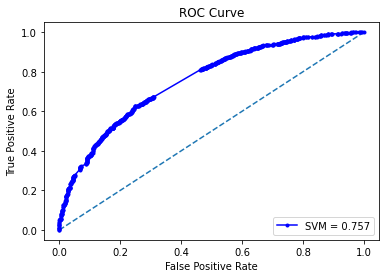

In [65]:
# ROC Eğrisi

# AUC: ROC Eğrisinin Altındaki Alandır
# AUC yüksek ise model daha iyi tahmin yapmış demektir.

plt.title('ROC Curve')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(svm_fpr, svm_tpr, 'b', marker='.', label = 'SVM = %0.3f' % svm_auc )

plt.legend(loc = 'lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Lojistik Regresyon

In [40]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(random_state = 0)
LR.fit(train_MATRIX, y_train)

LogisticRegression(random_state=0)

In [41]:
predictions_LR = LR.predict(Test_X_Tdif)

In [42]:
print(classification_report(y_test,predictions_LR))

              precision    recall  f1-score   support

           0       0.66      0.76      0.71       997
           1       0.72      0.62      0.66      1003

    accuracy                           0.69      2000
   macro avg       0.69      0.69      0.69      2000
weighted avg       0.69      0.69      0.68      2000



In [43]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, predictions_LR)

0.3135

In [45]:
# !pip install scikit-plot

<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

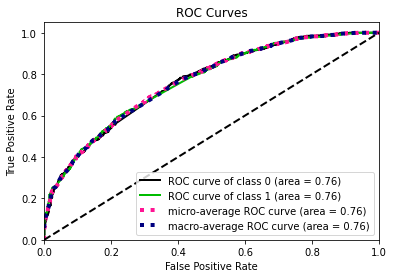

In [49]:
# Lojistik Regresyon İçin Roc Eğrisi
import scikitplot.metrics as splt

predicted_proba = LR.predict_proba(Test_X_Tdif)
splt.plot_roc(y_test, predicted_proba)